In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
train_df = pd.read_csv('G:/Bharathiar University/Manoj_ML/train.csv')
test_df = pd.read_csv('G:/Bharathiar University/Manoj_ML/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
train_df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


<AxesSubplot:>

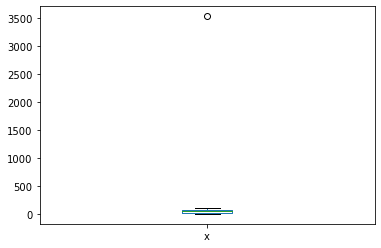

In [5]:
##data wrangle
train_df['x'].plot(kind = 'box')

In [6]:
train_df[train_df['x']>3500]
##drop this row

,x,y
213,3530.157369,NaN


<AxesSubplot:xlabel='x', ylabel='y'>

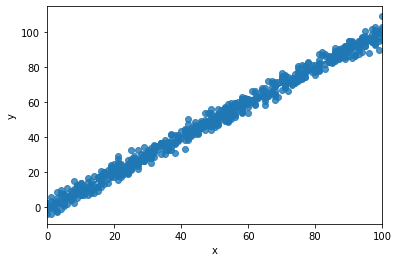

In [7]:
sns.regplot(x='x',y='y',data=train_df)

In [8]:
train_df.dropna(inplace = True)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


<AxesSubplot:ylabel='Frequency'>

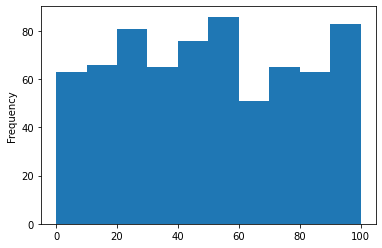

In [10]:
train_df['x'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

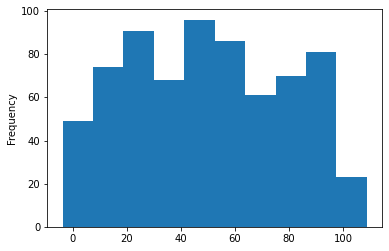

In [11]:
train_df['y'].plot(kind = 'hist')

In [12]:
## feature scaling
#using z-score
from sklearn.preprocessing import StandardScaler as sc
scaler = sc()
train_df = scaler.fit_transform(train_df)
test_df =scaler.transform(test_df)

In [13]:
test_df[:5]

array([[ 0.93266889,  1.02567675],
       [-1.00278099, -0.92004379],
       [-0.96821939, -0.83643714],
       [-1.0373426 , -1.10293088],
       [-0.48435691, -0.27811802]])

(array([63., 66., 81., 65., 76., 86., 51., 65., 63., 83.]),
 array([-1.72857470e+00, -1.38295865e+00, -1.03734260e+00, -6.91726546e-01,
        -3.46110495e-01, -4.94443564e-04,  3.45121607e-01,  6.90737658e-01,
         1.03635371e+00,  1.38196976e+00,  1.72758581e+00]),
 <BarContainer object of 10 artists>)

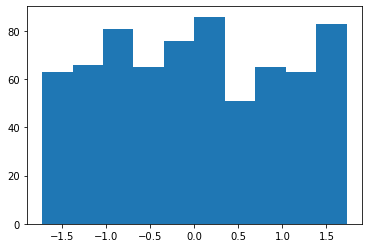

In [14]:
from matplotlib import pyplot as plt
plt.hist(train_df[:,0])

(array([49., 74., 91., 68., 96., 86., 61., 70., 81., 23.]),
 array([-1.8488426 , -1.4613629 , -1.07388319, -0.68640348, -0.29892377,
         0.08855594,  0.47603565,  0.86351535,  1.25099506,  1.63847477,
         2.02595448]),
 <BarContainer object of 10 artists>)

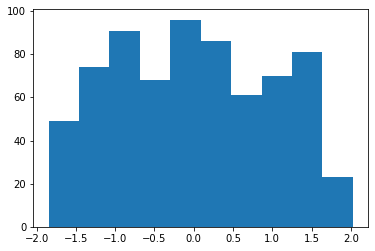

In [15]:
plt.hist(train_df[:,1])

In [16]:
#data is now scaled and still has the distribution is the same

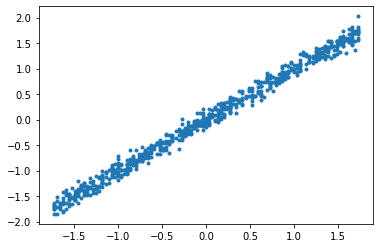

In [17]:
plt.plot(train_df[:,0],train_df[:,1],'.')

In [18]:
m = len(train_df)
m

699

In [19]:
theta0 = -1.6
theta1 = 1.0
x = train_df[:,0]
y = train_df[:,1]

In [20]:
J = []
alpha = 0.01
for i in range(1,2000):
    h = theta0 + theta1*x;
    j = (1/m)*np.sum((h-y)**2);
    J.append(j);
    temp0 = (alpha/m)*np.sum(h-y)
    temp1 = (alpha/m)*np.sum((h-y)*x)
    theta0 = theta0 - temp0
    theta1 = theta1 - temp1

<AxesSubplot:xlabel='index', ylabel='y'>

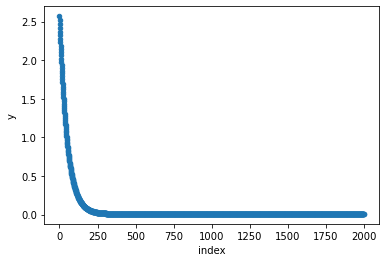

In [21]:
#cost function visualization
J_dict = {'y':J}
J1 = pd.DataFrame(J_dict)
J1.reset_index(inplace = True)
J1.head()
J1.plot(kind = 'scatter' , x='index',y='y')

In [22]:
print(theta0,theta1)

-3.012132119879022e-09 0.9953399077300258


In [23]:
h = theta0 + theta1*test_df[:,0]
h[:5]

array([ 0.92832257, -0.99810794, -0.9637074 , -1.03250849, -0.48209977])

In [24]:
from sklearn.metrics import r2_score
score=r2_score(test_df[:,1],h)
score

0.9888014443618015

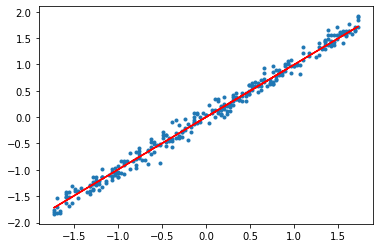

In [25]:
#ploting test data vs hypothesis
x = test_df[:,0]
y = test_df[:,1]
plt.plot(x,y,'.')
plt.plot(x,h,'r')

In [26]:
result = test_df
result[:,1] = h
result[:5]

array([[ 0.93266889,  0.92832257],
       [-1.00278099, -0.99810794],
       [-0.96821939, -0.9637074 ],
       [-1.0373426 , -1.03250849],
       [-0.48435691, -0.48209977]])

In [27]:
result = scaler.inverse_transform(result)
result[:5]

array([[77.        , 76.94327585],
       [21.        , 20.90651847],
       [22.        , 21.90717485],
       [20.        , 19.90586208],
       [36.        , 35.91636419]])